# LastFM Output Analysis

## Setup

Libraries:

In [1]:
library(MASS)
library(plyr)
library(dplyr)
library(readr)
library(ggplot2)
library(reshape2)


Attaching package: 'dplyr'

The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from 'package:MASS':

    select

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Options:

In [2]:
options(repr.plot.height=5)
options(repr.matrix.max.rows=20)
options(repr.matrix.max.columns=10)

## Input data

In [3]:
users.meta = read_csv("build/lastfm-users.csv") %>%
    mutate(gender=as.factor(gender),
           age=as.factor(age))
users.meta

Parsed with column specification:
cols(
  id = col_integer(),
  key = col_character(),
  gender = col_character(),
  age = col_integer()
)


id,key,gender,age
1,00000c289a1829a808ac09c00daf10bc3c4e223b,f,22
2,00001411dc427966b17297bf4d69e7e193135d89,f,NA
3,00004d2ac9316e22dc007ab2243d6fcb239e707d,NA,NA
4,000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,m,19
5,00007a47085b9aab8af55f52ec8846ac479ac4fe,m,28
6,0000c176103e538d5c9828e695fed4f7ae42dd01,m,20
7,0000ee7dd906373efa37f4e1185bfe1e3f8695ae,m,17
8,0000ef373bbd0d89ce796abae961f2705e8c1faf,f,22
9,0000f687d4fe9c1ed49620fbc5ed5b0d7798ea20,f,24
10,0001399387da41d557219578fb08b12afa25ab67,m,NA


In [4]:
user.results = read_csv("build/lastfm-user-results.csv", guess_max=10000) %>%
    rename(user=User) %>%
    inner_join(users.meta %>% rename(user=id) %>% select(-key))
user.results

Parsed with column specification:
cols(
  DataSet = col_character(),
  Partition = col_integer(),
  Algorithm = col_character(),
  User = col_integer(),
  TestTime = col_double(),
  TopN.nDCG = col_double(),
  Rank = col_integer(),
  RecipRank = col_double(),
  AvgPrec = col_double(),
  Precision = col_double(),
  Recall = col_double(),
  F1 = col_double(),
  `1R.TopN.nDCG` = col_character(),
  `1R.Rank` = col_character(),
  `1R.RecipRank` = col_character(),
  `1R.AvgPrec` = col_character(),
  `1R.Precision` = col_character(),
  `1R.Recall` = col_character(),
  `1R.F1` = col_character()
)
Joining, by = "user"


DataSet,Partition,Algorithm,user,TestTime,TopN.nDCG,Rank,RecipRank,AvgPrec,Precision,...,F1,1R.TopN.nDCG,1R.Rank,1R.RecipRank,1R.AvgPrec,1R.Precision,1R.Recall,1R.F1,gender,age
LastFM.UI,2,PopCt,11,0.274,NaN,NA,0.0000000,0.0000000,0.00,...,0.00000000,NA,NA,NA,NA,NA,NA,NA,m,27
LastFM.UI,2,Pop,11,0.287,NaN,NA,0.0000000,0.0000000,0.00,...,0.00000000,NA,NA,NA,NA,NA,NA,NA,m,27
LastFM,1,Pop,69,0.452,NaN,NA,0.0000000,0.0000000,0.00,...,0.00000000,NA,NA,NA,NA,NA,NA,NA,f,23
LastFM.UI,3,Pop,1,0.350,NaN,NA,0.0000000,0.0000000,0.00,...,0.00000000,NA,NA,NA,NA,NA,NA,NA,f,22
LastFM.UI,3,PopCt,1,0.341,NaN,NA,0.0000000,0.0000000,0.00,...,0.00000000,NA,NA,NA,NA,NA,NA,NA,f,22
LastFM.UI,4,Pop,70,0.303,NaN,NA,0.0000000,0.0000000,0.00,...,0.00000000,NA,NA,NA,NA,NA,NA,NA,f,22
LastFM.UI,2,PopCt,21,0.093,NaN,NA,0.0000000,0.0000000,0.00,...,0.00000000,NA,NA,NA,NA,NA,NA,NA,m,NA
LastFM.UI,4,PopCt,70,0.283,NaN,NA,0.0000000,0.0000000,0.00,...,0.00000000,NA,NA,NA,NA,NA,NA,NA,f,22
LastFM.UI,2,Pop,21,0.089,NaN,NA,0.0000000,0.0000000,0.00,...,0.00000000,NA,NA,NA,NA,NA,NA,NA,m,NA
LastFM,1,Pop,92,0.086,NaN,3,0.3333333,0.1766667,0.02,...,0.03809524,NA,NA,NA,NA,NA,NA,NA,m,27


## Analyze by Gender

In [9]:
gender.results = user.results %>%
    group_by(DataSet, Algorithm, gender) %>%
    summarize(MAP=mean(AvgPrec, na.rm=TRUE), MRR=mean(RecipRank, na.rm=TRUE),
              Precision=mean(Precision),
              Recall=mean(Recall))
gender.tall = melt(gender.results, variable.name = "Metric")

Using DataSet, Algorithm, gender as id variables


In [14]:
overall.results = user.results %>%
    group_by(DataSet, Algorithm) %>%
    summarize(MAP=mean(AvgPrec, na.rm=TRUE), MRR=mean(RecipRank, na.rm=TRUE),
              Precision=mean(Precision),
              Recall=mean(Recall))
combined.results = rbind(gender.results, mutate(overall.results, gender='Any'))
combined.tall = melt(combined.results, variable.name='Metric')

Warning message in bind_rows_(x, .id):
"binding factor and character vector, coercing into character vector"Using DataSet, Algorithm, gender as id variables


Warning message:
"Removed 8 rows containing missing values (geom_bar)."

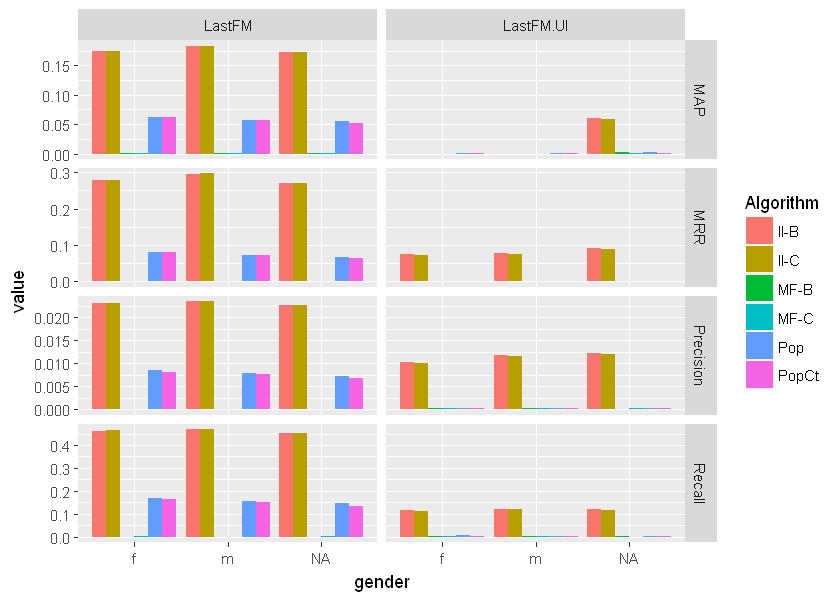

In [6]:
ggplot(gender.tall) +
    aes(x=gender, y=value, fill=Algorithm) +
    geom_bar(stat="identity", position="dodge") +
    facet_grid(Metric ~ DataSet, scales="free")

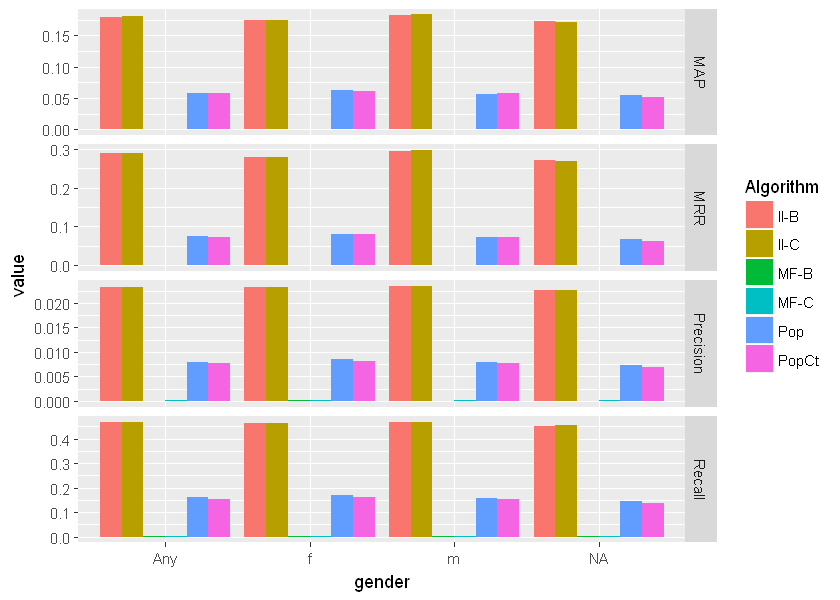

In [15]:
ggplot(combined.tall %>% filter(DataSet == 'LastFM')) +
    aes(x=gender, y=value, fill=Algorithm) +
    geom_bar(stat="identity", position="dodge") +
    facet_grid(Metric ~ ., scales="free")

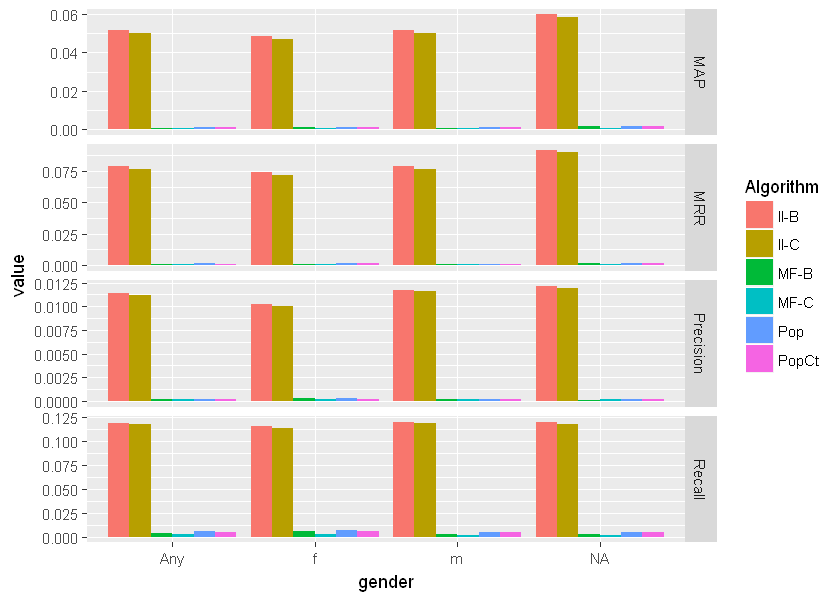

In [16]:
ggplot(combined.tall %>% filter(DataSet == 'LastFM.UI')) +
    aes(x=gender, y=value, fill=Algorithm) +
    geom_bar(stat="identity", position="dodge") +
    facet_grid(Metric ~ ., scales="free")